In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


students=pd.read_csv("StudentsPerformance.csv")
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [2]:
scores= ['math score', 'reading score', 'writing score']
students['score_avg'] = round(students[scores].apply(lambda x: x.sum()/3, axis=1), 2)

In [3]:
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,score_avg
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67
1,female,group C,some college,standard,completed,69,90,88,82.33
2,female,group B,master's degree,standard,none,90,95,93,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33
4,male,group C,some college,standard,none,76,78,75,76.33


Criar uma variável target binária, score_avg > 7, aprovado, contrário, reprovado

In [4]:
students['Passed'] = np.where(students['score_avg'] < 70.00, 0, 1)
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,score_avg,Passed
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67,1
1,female,group C,some college,standard,completed,69,90,88,82.33,1
2,female,group B,master's degree,standard,none,90,95,93,92.67,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33,0
4,male,group C,some college,standard,none,76,78,75,76.33,1


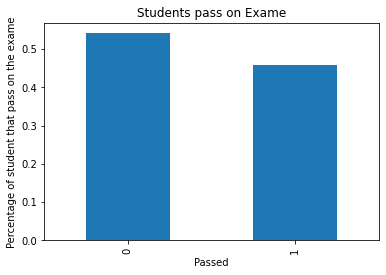

In [5]:
# Porcentagem dos alunos que passaram
(students['Passed'].value_counts() / len(students)).sort_index().plot.bar()

# plot
plt.title('Students pass on Exame')
plt.ylabel('Percentage of student that pass on the exame')
plt.xlabel('Passed')
plt.show()

In [6]:
students.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                       int64
reading score                    int64
writing score                    int64
score_avg                      float64
Passed                           int64
dtype: object

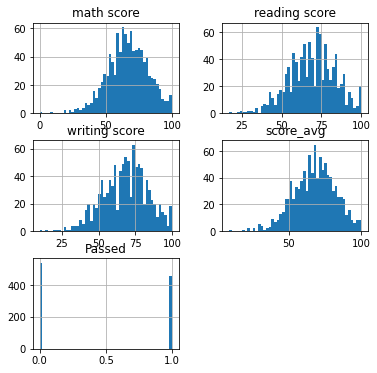

In [7]:
students.hist(bins=50, figsize=(6, 6))
plt.show()

In [8]:
students.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
score_avg                      0
Passed                         0
dtype: int64

In [9]:
data = students.drop(columns=['Passed', 'score_avg'])
target = students['Passed']
from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(data)
categorical_columns=categorical_columns_selector(data)

In [10]:
data.columns.tolist()

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course',
 'math score',
 'reading score',
 'writing score']

In [11]:
categorical_columns

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [12]:
from sklearn import set_config
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_validate

In [13]:
# separate dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data, target,
                test_size = 0.2,
                random_state=123)

In [14]:
X_train.shape, X_test.shape

((800, 8), (200, 8))

In [15]:
%%time
categorical_preprocessor = OrdinalEncoder(handle_unknown='use_encoded_value',
                                          unknown_value=-1)

preprocessor = ColumnTransformer([
    ('categorical', categorical_preprocessor, categorical_columns)],
    remainder='passthrough')

model = make_pipeline(preprocessor,GradientBoostingClassifier(random_state=123))

CPU times: user 229 µs, sys: 51 µs, total: 280 µs
Wall time: 288 µs


In [16]:
cv_results = cross_validate(model, X_test, y_test)
scores = cv_results["test_score"]
print("The mean cross-validation accuracy is: "
      f"{scores.mean():.3f} +/- {scores.std():.3f}")

The mean cross-validation accuracy is: 0.975 +/- 0.027
